In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Resample Data Into New Dataset

# Resample Train Data

In [2]:
from common.src import resample as res

In [3]:
from imblearn.over_sampling import BorderlineSMOTE

path = r'C:\Users\mmitk\dev\2020\pneumonia\common\data\chest_xray\train'
SM = BorderlineSMOTE(random_state=0)

In [4]:
res.resample_directory(SM, path, 'borderlineSMOTE', val = False)

# Load Data

In [5]:
train_folder= './common/data/resampled/borderlineSMOTE/train'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [7]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

# Generate Dataset from image data

In [8]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/resampled/borderlineSMOTE/train')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/', batch_size = 1, shuffle = False) 

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [9]:
from common.src import models

cnn = models.CNNModel(patience_s=49)
cnn.create_model()
cnn.summary()

# Fit Model

In [10]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs=50)

Epoch 1/50
163/163 [==============================] - 17s 102ms/step - loss: 0.3096 - tp: 4478.0000 - fp: 734.0000 - tn: 4456.0000 - fn: 712.0000 - accuracy: 0.8607 - precision: 0.8592 - recall: 0.8628 - auc: 0.9413 - val_loss: 0.4469 - val_tp: 247.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 57.0000 - val_accuracy: 0.7500 - val_precision: 0.7222 - val_recall: 0.8125 - val_auc: 0.8496
Epoch 2/50
163/163 [==============================] - 14s 89ms/step - loss: 0.2110 - tp: 4765.0000 - fp: 446.0000 - tn: 4770.0000 - fn: 451.0000 - accuracy: 0.9140 - precision: 0.9144 - recall: 0.9135 - auc: 0.9727 - val_loss: 0.3600 - val_tp: 247.0000 - val_fp: 57.0000 - val_tn: 247.0000 - val_fn: 57.0000 - val_accuracy: 0.8125 - val_precision: 0.8125 - val_recall: 0.8125 - val_auc: 0.9258
Epoch 3/50
163/163 [==============================] - 14s 87ms/step - loss: 0.2002 - tp: 4726.0000 - fp: 461.0000 - tn: 4729.0000 - fn: 464.0000 - accuracy: 0.9109 - precision: 0.9111 - recall: 0.9106 - auc: 0.9

163/163 [==============================] - 14s 83ms/step - loss: 0.0994 - tp: 5011.0000 - fp: 203.0000 - tn: 5013.0000 - fn: 205.0000 - accuracy: 0.9609 - precision: 0.9611 - recall: 0.9607 - auc: 0.9937 - val_loss: 0.3717 - val_tp: 209.0000 - val_fp: 95.0000 - val_tn: 209.0000 - val_fn: 95.0000 - val_accuracy: 0.6875 - val_precision: 0.6875 - val_recall: 0.6875 - val_auc: 0.8945
Epoch 22/50
163/163 [==============================] - 13s 80ms/step - loss: 0.0878 - tp: 5002.0000 - fp: 184.0000 - tn: 5006.0000 - fn: 188.0000 - accuracy: 0.9642 - precision: 0.9645 - recall: 0.9638 - auc: 0.9952 - val_loss: 0.2133 - val_tp: 285.0000 - val_fp: 19.0000 - val_tn: 285.0000 - val_fn: 19.0000 - val_accuracy: 0.9375 - val_precision: 0.9375 - val_recall: 0.9375 - val_auc: 0.9863
Epoch 23/50
163/163 [==============================] - 13s 81ms/step - loss: 0.1090 - tp: 4993.0000 - fp: 224.0000 - tn: 4992.0000 - fn: 223.0000 - accuracy: 0.9572 - precision: 0.9571 - recall: 0.9572 - auc: 0.9924 - val_

163/163 [==============================] - 13s 77ms/step - loss: 0.0763 - tp: 5021.0000 - fp: 143.0000 - tn: 5021.0000 - fn: 143.0000 - accuracy: 0.9723 - precision: 0.9723 - recall: 0.9723 - auc: 0.9961 - val_loss: 0.1834 - val_tp: 285.0000 - val_fp: 38.0000 - val_tn: 266.0000 - val_fn: 19.0000 - val_accuracy: 0.9062 - val_precision: 0.8824 - val_recall: 0.9375 - val_auc: 0.9922
Epoch 42/50
163/163 [==============================] - 13s 79ms/step - loss: 0.0820 - tp: 5048.0000 - fp: 163.0000 - tn: 5053.0000 - fn: 168.0000 - accuracy: 0.9683 - precision: 0.9687 - recall: 0.9678 - auc: 0.9956 - val_loss: 0.1361 - val_tp: 304.0000 - val_fp: 0.0000e+00 - val_tn: 304.0000 - val_fn: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - val_auc: 1.0000
Epoch 43/50
163/163 [==============================] - 13s 81ms/step - loss: 0.0734 - tp: 5075.0000 - fp: 145.0000 - tn: 5071.0000 - fn: 141.0000 - accuracy: 0.9726 - precision: 0.9722 - recall: 0.9730 - auc: 0.9964 

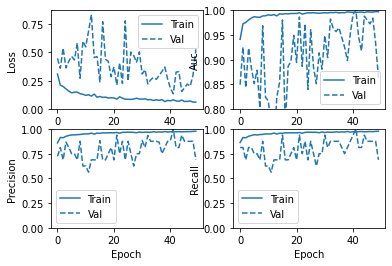

In [11]:
cnn.plot_history()

In [12]:
cnn.get_classification_report(test_set)

              precision    recall  f1-score   support

      NORMAL       0.97      0.73      0.83       234
   PNEUMONIA       0.86      0.98      0.92       390

    accuracy                           0.89       624
   macro avg       0.91      0.86      0.87       624
weighted avg       0.90      0.89      0.89       624



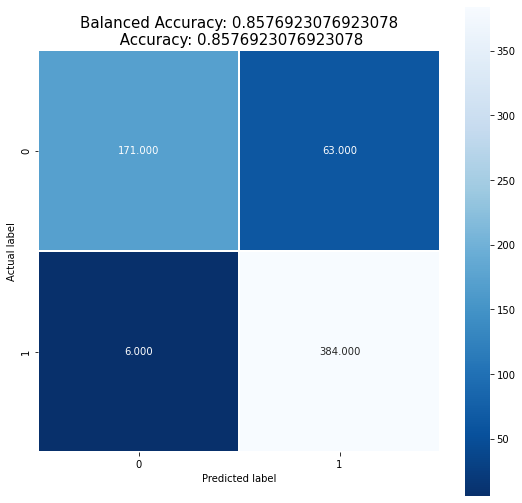

In [13]:
cnn.display_confusion_matrix(test_set)